# Assignment 3

**Handin in Peergrade**: *Wednesday*, November 13, 2019, 23:59<br>
**Peergrading deadline**: *Sunday*, November 17, 2019, 23:59<br>
**Peergrading feedback deadline**: *Tuesday*, November 19, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

In [3]:
import re
import nltk
from tqdm import tqdm

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def get_clean_words(character_filename, faction):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Load her markup
    with open("../caobd_f19/data/%s/%s" % (faction, character_filename)) as fp: #insert your own file path
        markup = fp.read()

    # Remove table and external links
    markup_text = re.sub(r'\{\{[\s\S]*?\}\}', '', markup)

    # Remove category links
    markup_text = re.sub(r'\[\[Category.+\]\]', '', markup_text)

    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in re.findall('\w+', markup_text) if w.lower() not in stopwords]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]

    return words

import os
def get_faction(char):
    faction = None
    ans = ''
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)] #insert your own file path
            if char in faction_chars:
                ans = faction
                break
    return ans

def get_universe():
    directory = "../caobd_f19/data/" #insert your own file path
    marvel_universe = []
    for faction in ["heroes", "ambiguous", "villains"]:
        faction_chars = [c[:-4] for c in os.listdir("../caobd_f19/data/%s" % faction)] #insert your own file path
        for i in faction_chars:
            marvel_universe.append(i)
            
    marvel_universe.sort()
    return marvel_universe

In [4]:
uni = get_universe()

vil = ""
hero =""
ambig =""
for i in tqdm(uni):
    faction = get_faction(i)
    txt = i+".txt"
    words = get_clean_words(txt, faction)
    if faction == 'heroes':
        for j in words:
            hero+= " " + j
    elif faction == 'villains':
        for k in words:
            vil+= " " + k
    else:
        for l in words:
            ambig+= " " + l

100%|██████████| 1874/1874 [00:15<00:00, 123.72it/s]


In [5]:
from afinn import Afinn
afinn = Afinn()

vil_list = []
hero_list = []
ambig_list = []
vil_sent = []
hero_sent =[]
ambig_sent =[]
for i in tqdm(uni):
    faction = get_faction(i)
    txt = i+".txt"
    words = get_clean_words(txt, faction)
    if faction == 'heroes':
        hero_list.append(i)
        hero=""
        for j in words:
            hero+= " " + j
        hero_sent.append(afinn.score(hero))
    elif faction == 'villains':
        vil_list.append(i)
        vil=""
        for k in words:
            vil+= " " + k
        vil_sent.append(afinn.score(vil))
    else:
        ambig_list.append(i)
        ambig=""
        for l in words:
            ambig+= " " + l
        ambig_sent.append(afinn.score(ambig))

100%|██████████| 1874/1874 [01:17<00:00, 24.06it/s]


## Problems

### Week 7

>**Ex. 7.2.1**: Compute the sentiment score of each character's page and produce three histograms of sentiment scores, one for each faction. You can use the text strings you generated in the previous exercise. We will cheat a bit and use a library that does the scoring for us. Install `afinn` using `conda` or `pip` and extract the sentiment with that module. There's an example of how to use it on the library's [PyPi repository](https://pypi.python.org/pypi/afinn).

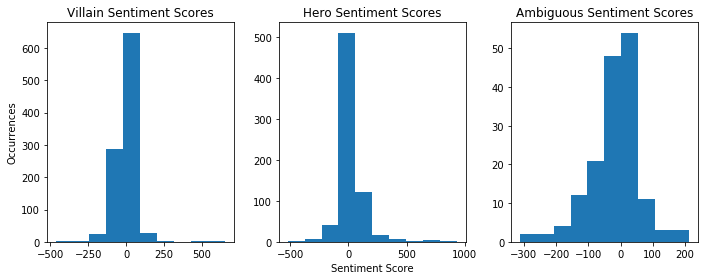

In [28]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.ylabel("Occurrences")
plt.hist(vil_sent)
plt.title("Villain Sentiment Scores")


plt.subplot(1,3,2)
plt.hist(hero_sent)
plt.xlabel("Sentiment Score")
plt.title("Hero Sentiment Scores")

plt.subplot(1,3,3)
plt.tight_layout()
plt.hist(ambig_sent)
plt.title("Ambiguous Sentiment Scores")

plt.show()

>**Ex. 7.4.1**: Use any tool you like (you can do it manually, it's straight forward if you understand the method), to perform a TF-IDF transform on your BoW matrix from Ex. 7.3.1. The result should be a matrix of the same shape as the BoW, but with different values inside.
1. Explain what these values mean.
2. For the top three most written about characters in each class (so 9 in total), print out each of their 10 highest scoring words. Comment on any differences you observe in the type of words being used in different classes.

In [6]:
#BoW
import pandas as pd
import numpy as np

uni = get_universe()
allwords = []
wordbag = []
char_factions = dict()

for i in tqdm(uni):
    faction = get_faction(i)
    char_factions[i] = faction # store the faction
    txt = i+".txt"
    words = get_clean_words(txt, faction)
    for j in words:
        if j not in allwords:
            allwords.append(j)

matrix = np.zeros((len(uni), len(allwords)))
    
for charindex, i in tqdm(enumerate(uni)):
    faction = char_factions[i]
    txt = i+".txt"
    words = get_clean_words(txt, faction)
    for j in words:
        wordindex = allwords.index(j)
        matrix[charindex, wordindex] += 1

100%|██████████| 1874/1874 [02:09<00:00, 14.53it/s]
1874it [02:19, 13.41it/s]


In [7]:
df = pd.DataFrame(matrix, columns=allwords, index=uni)
df

,special,agent,abigail,brand,fictional,character,appearing,american,comic,book,...,reicht,zota,pergamum,exponent,combing,bogatyr,shortcircuited,mccutcheon,cruler,fump
Abigail Brand,2.0,9.0,21.0,61.0,2.0,6.0,1.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abner Jenkins,0.0,2.0,0.0,0.0,2.0,8.0,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abomination (comics),0.0,3.0,0.0,0.0,2.0,11.0,1.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abraham Cornelius,0.0,0.0,0.0,0.0,2.0,6.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absalom (comics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiak (comics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombie (comics),0.0,0.0,0.0,0.0,3.0,9.0,1.0,1.0,5.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zota,0.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,...,0.0,20.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Zvezda Dennista,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
df_wordsum = df.sum(1)
df_wordsum

Abigail Brand           1559.0
Abner Jenkins           2198.0
Abomination (comics)    2669.0
Abraham Cornelius        891.0
Absalom (comics)           2.0
                         ...  
Zodiak (comics)            7.0
Zombie (comics)         1102.0
Zota                     287.0
Zvezda Dennista            3.0
Zzzax                    924.0
Length: 1874, dtype: float64

In [9]:
vil_dict = {}
hero_dict = {}
ambig_dict = {}

for i in vil_list:
    vil_dict[i] = df_wordsum[i]
    
for j in hero_list:
    hero_dict[j] = df_wordsum[j]
    
for k in ambig_list:
    ambig_dict[k] = df_wordsum[k]
    
import operator
sorted_vil = sorted(vil_dict.items(), key=operator.itemgetter(1), reverse =True)
sorted_hero = sorted(hero_dict.items(), key=operator.itemgetter(1), reverse =True)
sorted_ambig = sorted(ambig_dict.items(), key=operator.itemgetter(1), reverse =True)

top_vil = sorted_vil[0:3]
top_hero = sorted_hero[0:3]
top_ambig = sorted_ambig[0:3]

In [10]:
#normalize rows
#sum row divide by number of words 

df_tf = df.div(df.sum(axis=1), axis=0)
df_tf

,special,agent,abigail,brand,fictional,character,appearing,american,comic,book,...,reicht,zota,pergamum,exponent,combing,bogatyr,shortcircuited,mccutcheon,cruler,fump
Abigail Brand,0.001283,0.005773,0.01347,0.039128,0.001283,0.003849,0.000641,0.000641,0.003207,0.001924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abner Jenkins,0.000000,0.000910,0.00000,0.000000,0.000910,0.003640,0.000455,0.000910,0.000910,0.000910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abomination (comics),0.000000,0.001124,0.00000,0.000000,0.000749,0.004121,0.000375,0.000375,0.001873,0.001124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abraham Cornelius,0.000000,0.000000,0.00000,0.000000,0.002245,0.006734,0.001122,0.001122,0.002245,0.001122,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Absalom (comics),0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiak (comics),0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zombie (comics),0.000000,0.000000,0.00000,0.000000,0.002722,0.008167,0.000907,0.000907,0.004537,0.001815,...,0.000907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zota,0.000000,0.000000,0.00000,0.000000,0.006969,0.010453,0.003484,0.003484,0.003484,0.003484,...,0.000000,0.069686,0.006969,0.003484,0.003484,0.000000,0.000000,0.000000,0.000000,0.000000
Zvezda Dennista,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000


In [11]:
N = df.shape[0]
inv_doc_freq = np.log(N / (1 + (df != 0).sum(0))) + 1

In [12]:
df_tf_idf = df_tf.multiply(inv_doc_freq, axis=1)

In [13]:
df_tf_idf

,special,agent,abigail,brand,fictional,character,appearing,american,comic,book,...,reicht,zota,pergamum,exponent,combing,bogatyr,shortcircuited,mccutcheon,cruler,fump
Abigail Brand,0.003076,0.013207,0.069621,0.144755,0.001454,0.004353,0.000788,0.000783,0.003744,0.002292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abner Jenkins,0.000000,0.002082,0.000000,0.000000,0.001031,0.004116,0.000559,0.001111,0.001062,0.001084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abomination (comics),0.000000,0.002572,0.000000,0.000000,0.000849,0.004661,0.000460,0.000458,0.002187,0.001339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abraham Cornelius,0.000000,0.000000,0.000000,0.000000,0.002544,0.007616,0.001378,0.001371,0.002621,0.001337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Absalom (comics),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiak (comics),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zombie (comics),0.000000,0.000000,0.000000,0.000000,0.003085,0.009236,0.001114,0.001108,0.005297,0.002162,...,0.007117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zota,0.000000,0.000000,0.000000,0.000000,0.007898,0.011822,0.004279,0.004255,0.004068,0.004150,...,0.000000,0.546528,0.054653,0.027326,0.027326,0.000000,0.000000,0.000000,0.000000,0.000000
Zvezda Dennista,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.614228,0.000000,0.000000,0.000000,0.000000


<div class="alert alert-block alert-info">
<b>COMMENT 7.4.1 </b>   
    Explain what the values mean:  
    
The frequency–inverse document frequency values tell you which words are common or rare acrosse all the documents. This could reveal more interesting insights than just knowing what words appears a lot from the BoW, because it is most likely that "the" appears a lot in all of them. Also tf-idf is often used as a weight in search of information retreival and user modeling. The tf-idf value increases proportionally to the amount of times the word appears in the characters wikipage and is offset by the amount of other wikipages it appears in. This adjusts for the fact that some words are generally more frequent than others.
       
</div>

In [24]:
def highscoring_words(top_list):
    for i in top_list:
        word_idf_vals = df_tf_idf.loc[str(i[0])]
        temp_dict = {}
        for j in word_idf_vals.index:
            temp_dict[j] = word_idf_vals[j]

        sorted_temp = sorted(temp_dict.items(), key=operator.itemgetter(1), reverse =True)
        small = sorted_temp[0:10]
        print("\n" + i[0] + ":")
        concat = ""
        for k in small:
            concat += " " + k[0]
        
        print(concat)

In [26]:
#Villains
print("Top Highest Scoring words for ")
highscoring_words(top_vil) 

Top Highest Scoring words for 

Doctor Octopus:
 spider octopus octavius man ref doctor otto superior peter amazing

Loki (comics):
 loki thor ref asgard odin avengers name comics verity ultimates

Vulture (Marvel Comics):
 vulture spider toomes man ref adrian amazing drago harness vulturions


In [27]:
#Heros
highscoring_words(top_hero)


Psylocke:
 psylocke ref x men betsy uncanny braddock vol comics exiles

Cyclops (Marvel Comics):
 cyclops x men ref scott jean uncanny phoenix emma xavier

Spider-Man:
 spider ref man name amazing parker ditko peter lee award


In [28]:
#Ambig
highscoring_words(top_ambig) 


Phoenix Force (comics):
 phoenix jean ref x force men grey cyclops emma host

Emma Frost:
 frost x ref emma men phoenix name uxm hellfire diamond

Sabretooth (comics):
 sabretooth wolverine x ref creed men victor logan comics weapon


<div class="alert alert-block alert-info">
<b>COMMENT 7.4.1.2 </b>   
    Comment on any differences you observe in the type of words being used in different classes:  
    
I don't see much of a difference between factions. Looks a lot of them have their name and who they are affiliated with as their most commons words. Like x men is seen a lot because that is their affliated team. For villains, often times their nemesis is mentioned a lot. For loki, thor is mentioned enough to be in the top 10 words. For Doctor Octopus and Vulture, the amazing spider man is mentioned a lot. 
    
</div>

### Week 8

>**Ex. 8.2.1**: Modify the script from Ex. 8.1.1 so that it instead of word counts outputs the number of characters, words and lines in the file. Post as your answer in two seperate cells, (1) the code in the script in a code cell, and (2) the terminal output in a markdown cell with the text indented by one tab.

In [1]:
from mrjob.job import MRJob
# number of characters, words and lines 
class MRWordCounter(MRJob):
    def mapper(self, _, line):
        yield "chars:", len(line)
        yield "words:", len(line.split())
        yield "lines:", 1
                
    def reducer(self, key, vals):
        yield key, sum(vals)
            

#if __name__ == '__main__':
#    MRWordCounter.run()


    "words:"	21
    "lines:"	4
    "chars:"	88

>**Ex. 8.2.3**: Lets go a bit deeper. In this exercise you will implement a MapReduce-MapReduce operation, which computes the same thing as we computed above, but takes as input friend-network data in a slightly more common format: 

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>Each line is a "friend-link". The links are undirected and each only occurs once.

>Your job now, is to produce the same output as you did in Ex. 8.2.2, using this input data. To get started faster, use the template below, which shows how to chain together multiple MapReduce steps. Fill out the template and show the output that you get from the terminal when you run it. Clarify whether it corresponds with the output from Ex. 8.2.2.

>*Hint: Try to write the first MapReduce step such that it outputs key-value pairs that correspond to the input data format from Ex. 8.2.2. Then you can reuse your solution to Ex. 8.2.2 in your second MapReduce step.*

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep

class NumberOfTriangles(MRJob):

    def mapper1(self, _, line):
        person, friends = line.split()
        yield person, friends
        yield friends, person

    def reducer1(self, key, values):
        yield key, list(values)


    def mapper2(self, key, values):
        for friend in values:
            first = key
            second = friend
            if first > second:
                temp = first
                first = second
                second = temp
            yield (first, second), values

    def reducer2(self, key, values):
        vals = list(values)
        first, second = vals[0], vals[1]
        result = []
        if len(first) < len(second):
            for friend in first:
                if friend in second:
                    result.append(friend)
        else:
            for friend in second:
                if friend in first:
                    result.append(friend)
        yield key, result
            


    def steps(self):
        return [
            MRStep(
                mapper=self.mapper1,
                reducer=self.reducer1
            ),
            MRStep(
                mapper=self.mapper2,
                reducer=self.reducer2
            )
        ]

#if __name__ == '__main__':
#    NumberOfTriangles.run()

    ["B", "D"]	["A", "C", "E"]
    ["B", "E"]	["C", "D"]
    ["C", "D"]	["A", "B", "E"]
    ["C", "E"]	["B", "D"]
    ["D", "E"]	["B", "C"]
    ["A", "D"]	["B", "C"]
    ["B", "C"]	["A", "D", "E"]
    ["A", "B"]	["C", "D"]
    ["A", "C"]	["B", "D"]

<div class="alert alert-block alert-info">
<b>COMMENT 8.2.3 </b>   
    This output corresponds directly to that of 8.2.2
    
</div>


>**Ex. 8.2.4**: We can go even further! Let's add a third MapReduce step to count the number of triangles in a network. Again use this input data:

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>to validate that your implementation works. It should produce 7 triangles.

>1. Now compute the number of triangles in [this file](http://snap.stanford.edu/data/facebook_combined.txt.gz) which contains 88234 links in an anonymized facebook network. Don't print the whole output, just report the number you get.
>2. Do the same instead using all 2766607 road segments in California as your input. Go to [this site](https://www.cise.ufl.edu/research/sparse/matrices/SNAP/roadNet-CA.html) and download the data in Matrix Market format (`.mtx`). Unzip the file and remove the first 50 lines from it, since that is just markup that we don't need. The file is pretty big so you can expect it to take some time (~4 minutes on my computer). Report the number you get.

>*Hint: Counting triangles is equivalent to counting "common friends". One way to do that is to just count the collective number of common friends that exist in a network. Depending on your implementation you might want to correct your result by a factor 3, since it is likely that you end up counting each triangle three times (one for each point in it).*

>*Nerdy sidenote: Why would anyone want to count triangles??? Well, in network science there is a lot of statistical measures that include the count of triangles in a network. For example, the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient), which reveals the proportion of small closed loops in a network, is computed as the number of realized triangles divided by the number of possible triangles.*

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep

class NumberOfTriangles(MRJob):

    def mapper1(self, _, line):
        person, friends = line.split()
        yield person, friends
        yield friends, person

    def reducer1(self, key, values):
        yield key, list(values)


    def mapper2(self, key, values):
        for friend in values:
            first = key
            second = friend
            if first > second:
                temp = first
                first = second
                second = temp
            yield (first, second), values

    def reducer2(self, key, values):
        vals = list(values)
        first, second = vals[0], vals[1]
        result = []
        if len(first) < len(second):
            for friend in first:
                if friend in second:
                    result.append(friend)
        else:
            for friend in second:
                if friend in first:
                    result.append(friend)
        yield key, result


    def mapper3(self, key, values):
        yield "total", len(values)

    def reducer3(self, key, values):
        yield key, int(sum(values)/3)
        
    
    def steps(self):
        return [
            MRStep(
                mapper=self.mapper1,
                reducer=self.reducer1
            ),
            MRStep(
                mapper=self.mapper2,
                reducer=self.reducer2
            ),
            MRStep(
                mapper=self.mapper3,
                reducer=self.reducer3
            )
        ]

#if __name__ == '__main__':
#    NumberOfTriangles.run()
        

### Ans 8.2.4.1   
    "total"	1612010

### Ans 8.2.4.2
    "total"	120676